# Getting started with `numpy`
Prepared by: Gregory J. Bott, Ph.D. 

This notebook provides an introduction to the `numpy` package. The content borrows heavily from multiple sources:
* (one of our textbooks) The book *Data Science Handbook*, which was written by Jake VanderPlas available at https://jakevdp.github.io/PythonDataScienceHandbook/ (accessed 12/17/2019).
* Content from Dr. Nick Freeman (https://github.com/nkfreeman/Python_Tutorials)
* SciPy 2018 Conference session: Intro to Numerical Computing with NumPy by Alex Chabot-Leclerc (https://www.youtube.com/watch?v=V0D2mhVt7NE&list=PL2fyLI4jtOlCvb6QchwsZ0xm51PP5G0wf&index=17&t=147s)

NumPy (short for <em>**Num**erical **Py**thon</em>) provides efficient storage and manipulation of numerical arrays, which makes NumPy an integral package for scientific computing. Its origins can be traced back to two other specialized packages for calculating arrays: Numeric and Numarray. The Numpy library, first released in 2006 (1.0 version) is the unification of these two libraries. It is highly efficient handling multidimensional and large arrays and offers a large number of functions to manipulate arrays and perform mathematical calculations.

## The `numpy` package
NumPy is a foundational Python library written using Python and C that provides fast, efficient support for multi-dimensional arrays, mathemetical functions, slicing and selection capabilities, and broadcasting functions. It is available as a standalone or part of the Anaconda distribution.

In [1]:
%conda list

# packages in environment at C:\Users\gregb\anaconda3\envs\primary:
#
# Name                    Version                   Build  Channel
alabaster                 0.7.12                   py37_0  
alembic                   1.4.2              pyh9f0ad1d_0    conda-forge
argh                      0.26.2                   py37_0  
asn1crypto                1.3.0                    py37_0    conda-forge
astroid                   2.3.3                    py37_0    conda-forge
atomicwrites              1.3.0                    py37_1  
attrs                     19.3.0                     py_0    conda-forge
autopep8                  1.4.4                      py_0    conda-forge
babel                     2.8.0                      py_0    conda-forge
backcall                  0.1.0                    py37_0  
bcrypt                    3.1.7            py37he774522_0  
beautifulsoup4            4.8.2                    pypi_0    pypi
blas                      1.0                         mkl  

## Installing `numpy`
If numpy is not installed use either of the following to install the library:
```python
conda install numpy
pip install numpy
```
Then import the library. Although you can use a different variable, by convention, NumPy is imported as 'np'.
```python
import numpy as np
```

In [2]:
import numpy as np
np.version.version

widgetsnbextension        3.5.1                    py37_0    conda-forge
win_inet_pton             1.1.0                    py37_0    conda-forge
wincertstore              0.2                      py37_0  
winpty                    0.4.3                         4    conda-forge
wrapt                     1.11.2           py37he774522_0  
xz                        5.2.5                h62dcd97_0  
yaml                      0.1.7                hc54c509_2  
yapf                      0.28.0                     py_0    conda-forge
zeromq                    4.3.1                h33f27b4_3  
zipp                      2.2.0                      py_0    conda-forge
zlib                      1.2.11               h62dcd97_3  
zstd                      1.4.4                ha9fde0e_3  


'1.18.1'

## Importing `numpy`

If numpy is not installed use either of the following to install the library:
```python
conda install numpy
pip install numpy
```

Users can import available packages and modules using Python's `import` statement. Two forms of import expressions are commonly used.
1. The first common import expression takes the form **import mypackage as mp**. This statement imports a package named *mypackage*, and assigns it to the alias *mp*. Suppose that *mypackage* contains the definition for a function named *myfunction*. If this were true, we would call *myfunction* using the syntax `mp.myfunction(*args)`, where `*args` is a placeholder for any function arguments.<br>

2. The second common import expression takes the form **from mypackage import mysubmodule**. This statement imports a specific submodule from a package named *mypackage*. Since there is no alias, this type of import will bring in the functions specified in the submodule as they are writtin. For example, if the submodule *mysubmodule* includes a function called *myfunction*, we would call *myfunction* using the syntax `myfunction(*args)`, where `*args` is a placeholder for any function arguments.

<div class="alert alert-block alert-danger">
    <b>Name conflicts with <i>from - import</i> approach:</b> When using the <i>from - import</i> approach sepcified in bullet 2, it is important to make sure that method names in package or module you are importing do not conflict with names defined in the importing code. For example, if we import a submodule named *mysubmodule* that includes a function called *myfunction*, but we also have a function named *myfunction* in the importing code, there will be a naming conflict.
</div>

The following code block uses the *import - as* approach to import NumPy. The alias *np* is a standard convention.

In [3]:
import numpy as np

# Why use `numpy`?
Before we look at specific details of the `numpy` package, it is important to understand its motivation. `numpy` was developed to support scientific computations via the efficient implementation of a multi-dimensional array. In addition to an efficient array implementation, NumPy also includes functions for performing operations on NumPy arrays that are optimized for computational efficeincy. The following code block illustrate the substantial increase in efficiency that `numpy` provides in comparison to a standard Python list. Specifically, the example considers the task of adding two vectors of a specified size using both standard Python lists and `numpy` arrays. The time of the addition, and the size of the resulting objects are reported for comparison purposes.

The core object in the NumPy library is the ndarray (n-dimensional array) object. In this section we'll examine data types, how to create arrays, learn about the basic attributes of arrays, how to access elements within an array, and then how to slice, reshape, concatenate, and split arrays. 

> <div class="alert alert-block alert-info">
    <b>The <i>del()</i> function:</b> The <i>del()</i> function is a Python method that deletes a created object from memory. For example, <i>del(my_var)</i> deletes a Python variable named <i>my_var</i>, freeing any computer memory that was being used to store the variable. The <i>del(my_var)</i> can take multiple arguments. For example, <i>del(my_var1, my_var2)</i> deletes the Python variables named <i>my_var1</i> and <i>my_var2</i>. If you pass an argument to <i>del(my_var)</i> that does not correspond to an existing Python object, an error will be raised.
</div>

>The **np.arange()** function is an array creation routine that creates an instance of an ndarray with evenly spaced values. It takes the form:
```Python
numpy.arange([start, ]stop, [step, ], dtype=None)
```

Using Python lists, the addition took 1488 milliseconds.
The size of the result object based on Python lists is 81528056 bytes.

Using NumPy arrays, the addition took 22 milliseconds.
The size of the result object based on NumPy arrays is 40000096 bytes.



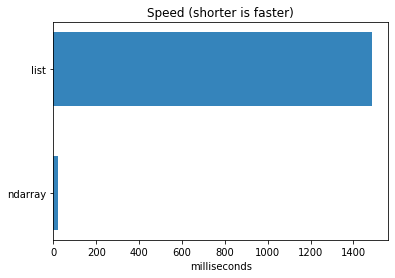

In [4]:
import time
import sys
import matplotlib.pyplot as plt
 
# 10 Million
SIZE = 10000000

list1 = range(SIZE)
list2 = range(SIZE)

start = time.time()

#Loop through every item in the array and 'zip' them together
result = [(x+y) for x,y in zip(list1,list2)]
list_time = (time.time() - start)*1000
#print("Using Python lists, the addition took",(time.time() - start)*1000,"milliseconds.")
print(f"Using Python lists, the addition took {list_time:.0f} milliseconds.")
print("The size of the result object based on Python lists is",sys.getsizeof(result),"bytes.\n")

del(list1, list2, result)

nparray1 = np.arange(SIZE)
nparray2 = np.arange(SIZE)
start = time.time()

# No need to loop through every item using NumPy. Simply use the '+' operator.
result = nparray1 + nparray2
array_time = (time.time() - start)*1000
print(f"Using NumPy arrays, the addition took {array_time:.0f} milliseconds.")
#print("Using NumPy arrays, the addition took",(time.time() - start)*1000,"milliseconds.")
print("The size of the result object based on NumPy arrays is",sys.getsizeof(result),"bytes.\n")

del(nparray1, nparray2, result)

objects = ('ndarray', 'list')
y_pos = np.arange(len(objects))
performance = [array_time, list_time]

plt.barh(y_pos, performance, align='center', alpha=.9, height=.6)
plt.yticks(y_pos, objects)
plt.xlabel('milliseconds')
plt.title('Speed (shorter is faster)')

plt.show()

In addition to demonstrating the substantial performance gains offered by NumPy, the previous code block also illsutrates some of the subtle differences of working with Python lists versus NumPy arrays.

- The `time.time()` function, from the `time` module, returns the current system time. Saving the value of the current time in a variable `start` and then computing the difference `time.time() - start` returns the seconds elapsing between the two calls to `time.time()` in seconds. Multiplying by 1000 converts the elapsed time to milliseconds. Another option capture the elapsed time for a line of code within an IPython notebook is to use the magic command `%timeit`.


- When working with Python lists, the `range()` function returns a sequence of integers starting at zero and ending at the argument passed to `range()`. In our example, we pass a variable `SIZE` to the `range()` function. Thus, the sequence stored in the list is 0, 1, ..., `SIZE`-2, `SIZE`-1.


- When working with NumPy arrays, the `np.arange()` function returns a sequence of integers starting at zero and ending at the argument passed to `np.arange()`. In our example, we pass a variable `SIZE` to the `np.arange()` function. Thus, the sequence stored in the NumPy array is 0, 1, ..., `SIZE`-2, `SIZE`-1.


- The `sys.getsizeof()` function, from the `sys` library, returns the size of an object in bytes.


- When working with Python lists, the `zip()` function essentially combines two or more list objects (like zipping up a jacket) and allows element-wise operations to be performed.


- When working with NumPy arrays, there is no need to *zip* arrays. Instead, element-wise operations are performed using standard mathematical operators.

### Jupyter's timeit Magic Command
<div class="alert alert-block alert-info">
    <b>Jupyter's <i>timeit</i> magic command:</b> Another approach for timing operations that is <b>specific to Jupyter notebooks</b> is the <i>timeit</i> magic command. This command can be used with syntax that follows the form <b>%timeit [-n &lt;N&gt; -r &lt;R&gt; [-t|-c] -q -p &lt;P&gt; -o]</b>, where

<li> -n &lt;N&gt;: specifies to execute the given statement &lt;N&gt; times in a loop. If <N> is not provided, <N> is determined so as to get sufficient accuracy.</li>

<li> -r &lt;R&gt;: specifies the number of repeats &lt;R&gt;, each consisting of &lt;N&gt; loops, and take the best result. Default: 7</li>

<li> -t: specifies to use time.time to measure the time, which is the default on Unix. This function measures wall time, i.e., elapsed real time.</li>

<li> -c: specifies to use time.clock to measure the time, which is the default on Windows and measures wall time. On Unix, resource.getrusage is used instead and returns the CPU user time.</li>

<li> -p &lt;P&gt;: specifies to use a precision of &lt;P&gt; digits to display the timing result. Default: 3</li>

<li> -q: specifies quiet calculation, where no results are printed.
</div>

The following block performs a the timing check using the `timeit` magic command, with 5 repeats of 10 executions. Note that by performing the calcuations multiple times, the `timeit` magic is able to provide estimates of the variability in computational time.

In [5]:
import matplotlib.pyplot as plt; plt.rcdefaults()
SIZE = 100000

list1 = range(SIZE)
list2 = range(SIZE)

print("Time statistics for Python lists:")
%timeit -n 10 -r 5 [(x+y) for x,y in zip(list1,list2)]

del(list1,list2)

nparray1 = np.arange(SIZE)
nparray2 = np.arange(SIZE)

print("\nTime statistics for NumPy arrays (micro seconds = milli/1000):")
%timeit -n 10 -r 5 nparray1 + nparray2

del(nparray1, nparray2)

Time statistics for Python lists:
13.8 ms ± 443 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

Time statistics for NumPy arrays (micro seconds = milli/1000):
67 µs ± 7.96 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


## How to find useful `numpy` objects
`numpy` contains hundreds objects providing powerful options for the data scientiest. Use the lookfor() function to search by docstring keywords (all words must be present, but can be in any order). For example, if your solution requires taking the standard deviation, use the lookfor() function to display all `numpy` objects that have the key words "standard deviation" in their docstring.

In [6]:
# Using the lookfor() function to find functions related to standard deviation (if error, run again)
import numpy as np
np.lookfor("standard deviation")

Search results for 'standard deviation'
---------------------------------------
numpy.std
    Compute the standard deviation along the specified axis.
numpy.nanstd
    Compute the standard deviation along the specified axis, while
numpy.ma.std
    Returns the standard deviation of the array elements along given axis.
numpy.matrix.std
    Return the standard deviation of the array elements along the given axis.
numpy.chararray.std
    Returns the standard deviation of the array elements along given axis.
numpy.ma.MaskedArray.std
    Returns the standard deviation of the array elements along given axis.
numpy.random.Generator.standard_t
    Draw samples from a standard Student's t distribution with `df` degrees
numpy.random.RandomState.standard_t
    Draw samples from a standard Student's t distribution with `df` degrees
numpy.random.Generator.standard_normal
    Draw samples from a standard Normal distribution (mean=0, stdev=1).
numpy.random.RandomState.standard_normal
    Draw samples 

## Getting help
Remember that help is available via the help() function. Also remember that you must provide the proper context.

In [7]:
# ERROR - no contxt
help(linspace)

NameError: name 'linspace' is not defined

In [8]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is

# `numpy` data types
In contrast to Python lists where items of different types are acceptable members, each value in a `numpy` array must be the same type. Mixing types (e.g., a float with integers) will result in an upcast of the array (e.g., to float64 instead of an int).

<table style="border-collapse: collapse;border-top: 0.5pt solid ; border-bottom: 0.5pt solid ; border-left: 0.5pt solid ; border-right: 0.5pt solid ; "><colgroup><col class="tcol1 align-left"><col class="tcol2 align-left"></colgroup><thead><tr><th style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Data Type</p></th><th style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Description</p></th></tr></thead><tbody><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">bool_</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Boolean (true or false) stored as a byte</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">int_</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Default integer type (same as C long; normally either <span class="EmphasisFontCategoryNonProportional ">int64</span> or <span class="EmphasisFontCategoryNonProportional ">int32</span>)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">intc</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Identical to C int (normally <span class="EmphasisFontCategoryNonProportional ">int32</span> or <span class="EmphasisFontCategoryNonProportional ">int64</span>)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">intp</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Integer used for indexing (same as C <span class="EmphasisFontCategoryNonProportional ">size_t</span>; normally either <span class="EmphasisFontCategoryNonProportional ">int32</span> or <span class="EmphasisFontCategoryNonProportional ">int64</span>)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">int8</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Byte (–128 to 127)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">int16</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Integer (–32768 to 32767)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">int32</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Integer (–2147483648 to 2147483647)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">int64</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Integer (–9223372036854775808 to 9223372036854775807)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">uint8</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Unsigned integer (0 to 255)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">uint16</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Unsigned integer (0 to 65535)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">uint32</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Unsigned integer (0 to 4294967295)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">uint64</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Unsigned integer (0 to 18446744073709551615)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">float_</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Shorthand for <span class="EmphasisFontCategoryNonProportional ">float64</span></p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">float16</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Half precision float: sign bit, 5-bit exponent, 10-bit mantissa</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">float32</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Single precision float: sign bit, 8-bit exponent, 23-bit mantissa</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">float64</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Double precision float: sign bit, 11-bit exponent, 52-bit mantissa</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">complex_</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Shorthand for complex128</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">complex64</span>
                        </p></td>
    <td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Complex number, represented by two 32-bit floats (real and imaginary components)</p></td></tr><tr><td style="border-right: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">complex128</span>
                        </p></td><td style="text-align: left;"><p class="SimplePara">Complex number, represented by two 64-bit floats (real and imaginary components)

# Creating `numpy` arrays
There are many different ways to create `numpy` arrays.

## Using np.array

In [9]:
import numpy as np
# Using a list to create a one-dimensional (1-d) array
array_1 = np.array([5, 10, 15, 20])
print(array_1)

[ 5 10 15 20]


In [10]:
# The type of array is a NumPy N-Dimensional array
type(array_1)

numpy.ndarray

In [11]:
# Display data type (varies by system)
print(array_1.dtype)

int32


In [12]:
# If any member is a float, the array will be upcast (float64, system-dependent)
array_3 = np.array([1, 2.0, 3, 4])
print(array_3.dtype)
print(array_3)

float64
[1. 2. 3. 4.]


In [13]:
array_2 = np.array([1, 3, 7, 9])

print("Addition:")
print(array_1, "+", array_2)
print(array_1 + array_2)

Addition:
[ 5 10 15 20] + [1 3 7 9]
[ 6 13 22 29]


In [14]:
# Works with all other operators (multiplication, division, exponentiation, etc.)
print(array_1, "*", array_2)
print(array_1 * array_2)

[ 5 10 15 20] * [1 3 7 9]
[  5  30 105 180]


In [15]:
# Display the length of the array 
#   along each dimension
print(array_1.ndim)
print(array_1.shape)

1
(4,)


## Using np.arange()
The **np.arange()** function is a commonly-used array creation routine that creates an instance of an ndarray with evenly spaced values. It takes the form:
```Python
numpy.arange([start, ]stop, [step, ], dtype=None)
```
1. **start** is the first value in the array (optional)
2. **stop** is the last value in the array (required)
3. **step** defines the incremental difference between each consecutive number in the range (optional, default is 1)
4. **dytpe** specifies the output array data type

In [16]:
# Create an array: start = 0 (default), stop = 10, step = 1 (default)
my_array = np.arange(10)
print(my_array)

[0 1 2 3 4 5 6 7 8 9]


In [17]:
import pprint as pp
# Create an array of even numbers 2 to 100
my_array = np.arange(2, 105, 2)
pp.pprint(my_array)


array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104])


## Creating 2-d arrays
The basic unit of memory in `numpy` is a Row. Shape is referenced like this: (row, column). So a 2 x 4 array has 2 rows and four columns.

> Note the additional set of square brackets. The array function expects a single iterator as an argument. Passing multiple objects will raise an exception.

Although arrays are often created via reading from disk or other function, they can also be created manually using a list of lists.

In [18]:
# ERROR: Why?
array_2 = np.array([1,2,3,4],
                   [5,6,7,8])
print(array_2)
print(f"The type of this array is {type(array_2)} and its number of dimensions is {array_2.ndim}.")
print(f"The shape of this array is {array_2.shape}")

TypeError: data type not understood

In [19]:
# Using a list of lists to creating a two-dimensional (2-d) array
array_2 = np.array([[1,2,3,4],
                    [5,6,7,8]])
print(array_2)
print(f"The type of this array is {type(array_2)} and its number of dimensions is {array_2.ndim}.")
print(f"The shape of this array is {array_2.shape}")

[[1 2 3 4]
 [5 6 7 8]]
The type of this array is <class 'numpy.ndarray'> and its number of dimensions is 2.
The shape of this array is (2, 4)


In [20]:
# Use arange() to create a 2D (10 x 6) array 0 to 295
array_50 = np.arange(0,300,5).reshape(10,6)
print(array_50)

[[  0   5  10  15  20  25]
 [ 30  35  40  45  50  55]
 [ 60  65  70  75  80  85]
 [ 90  95 100 105 110 115]
 [120 125 130 135 140 145]
 [150 155 160 165 170 175]
 [180 185 190 195 200 205]
 [210 215 220 225 230 235]
 [240 245 250 255 260 265]
 [270 275 280 285 290 295]]


## Creating arrays using functions


In [21]:
import numpy as np

### Using the zeroes Function

In [22]:
# Creating a two-dimensional (2-d) array of size 4 x 5 (rows X columns)
# that is filled with zeros
np.zeros((4,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

### Using the ones Function

In [23]:
# Creating a two-dimensional (2-d) array of size 3 x 4 (rows X columns)
# that is filled with ones
np.ones((3,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

### Identity Matrix

In [24]:
# Creating a two-dimensional 5 x 5 identity matrix
identity_matrix = np.eye(5)
random_2 = np.random.randint(5,100,size=(5,5))
print("Random 5 x 5 matrix")
print(random_2,"\n")
print("This is the identity matrix provided by the NumPy eye() method.")
print(identity_matrix)
print("\nA given matrix multiplied by an identity matrix equals itself.")

print(np.dot(random_2,identity_matrix))

Random 5 x 5 matrix
[[99 55 36 53 46]
 [38 60 42 55 78]
 [55 43 38 40 24]
 [35 48 79 11 35]
 [72 29 32 66 51]] 

This is the identity matrix provided by the NumPy eye() method.
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

A given matrix multiplied by an identity matrix equals itself.
[[99. 55. 36. 53. 46.]
 [38. 60. 42. 55. 78.]
 [55. 43. 38. 40. 24.]
 [35. 48. 79. 11. 35.]
 [72. 29. 32. 66. 51.]]


### Random Number Generator

In [25]:
# Create 1-, 2-, and 3-dimensionsl random arrays using NumPy's random number generator.

np.random.seed(0) # use seed() to produce the same numbers each time

# Generate a one-dimensional array between 2 and 9 with six elements
random_1 = np.random.randint(2, 10, size=6)
print("One-dimensional random array:")
print(random_1)

# Generate a two-dimensional (3 x 4) array (0 to 9)
random_2 = np.random.randint(10, size=(3,4))
print("\nTwo-dimensional random array:")
print(random_2)

# Generate a three-dimensional (3 x 4 x 5) array (0 to 9)
random_3 = np.random.randint(10, size=(3,4,5))
print("\nThree-dimensional random array:")
print(random_3)

One-dimensional random array:
[6 9 7 2 5 5]

Two-dimensional random array:
[[3 7 9 3]
 [5 2 4 7]
 [6 8 8 1]]

Three-dimensional random array:
[[[6 7 7 8 1]
  [5 9 8 9 4]
  [3 0 3 5 0]
  [2 3 8 1 3]]

 [[3 3 7 0 1]
  [9 9 0 4 7]
  [3 2 7 2 0]
  [0 4 5 5 6]]

 [[8 4 1 4 9]
  [8 1 1 7 9]
  [9 3 6 7 2]
  [0 3 5 9 4]]]


In [26]:
# Creating a two-dimensional 5 x 3 matrix filled with
# values randomly drawn from a continuous uniform distribution
# that ranges from 0.0 to 100.0
np.random.uniform(low = 0.0, high = 100.0, size = (5, 3))

array([[63.4274058 , 95.89492686, 65.2790317 ],
       [63.50588736, 99.52995677, 58.18503294],
       [41.43685882, 47.46975023, 62.35101011],
       [33.80076148, 67.47523223, 31.72017421],
       [77.8345482 , 94.95710535, 66.2526867 ]])

In [27]:
# Creating a two-dimensional 3 x 3 matrix filled with
# values randomly drawn from a normal distribution with
# a mean of 10.0 and standard deviation of 2.0 
np.random.normal(loc = 10.0, scale = 2.0, size = (3,3))

array([[10.0537385 , 12.11167427,  9.85363315],
       [ 8.66855868,  9.91177518,  9.27346596],
       [ 9.97531037, 10.08424298, 13.91859178]])

## Using the linspace Method
Use the linspace method to create equally spaced elements in an array. The method commonly takes three arguments: start, stop, and num. Num is the number of evenly spaced numbers to create within the start and stop range.
```Python
# linspace(start_index, stop_index, num)
my_array = np.linspace(1, 10, 40)
```

In [28]:
my_array = np.linspace(1, 12, 40, endpoint=False)
print(my_array)

[ 1.     1.275  1.55   1.825  2.1    2.375  2.65   2.925  3.2    3.475
  3.75   4.025  4.3    4.575  4.85   5.125  5.4    5.675  5.95   6.225
  6.5    6.775  7.05   7.325  7.6    7.875  8.15   8.425  8.7    8.975
  9.25   9.525  9.8   10.075 10.35  10.625 10.9   11.175 11.45  11.725]


# `numpy` Array attributes
In this section we'll discuss useful array attributes.

In [29]:
import numpy as np
array_1 = np.array([True, False, False, True, True])

print(array_1, "\n")

# Display the number of dimensions, size, shape, number of bytes
print(f"Shape = {array_1.shape}")
print(f"Dimensions = {array_1.ndim}")
print(f"Size = {array_1.size}")
print(f"Item size = {array_1.itemsize}")
print(f"Bytes = {array_1.nbytes}")

[ True False False  True  True] 

Shape = (5,)
Dimensions = 1
Size = 5
Item size = 1
Bytes = 5


In [30]:
exam_scores = np.array([["exam1","exam2","exam3"],[99.5,100,67]])
print(exam_scores,"\n")
print(f"Shape = {exam_scores.shape}")
print(f"Dimensions = {exam_scores.ndim}")
print(f"Size = {exam_scores.size}")
print(f"Item size = {exam_scores.itemsize}")
print(f"Bytes = {exam_scores.nbytes}")

[['exam1' 'exam2' 'exam3']
 ['99.5' '100' '67']] 

Shape = (2, 3)
Dimensions = 2
Size = 6
Item size = 20
Bytes = 120


## Array indexing: Acessing single elements

Arrays are zero-based. 

In [31]:
my_array = np.array([1,2,4,6,8,100,])

# arrays are zero-based
print(f"The first element is {my_array[0]}")


The first element is 1


Like lists, dictionaries, and arrays in Python, NumPy arrays are mutable.

In [32]:
# Change my_array[5] to "10"
print(f"Current value of element 5 = {my_array[5]}")
my_array[5] = 10
print(f"New value of element 5 = {my_array[5]}")

Current value of element 5 = 100
New value of element 5 = 10


### Type Coercion
Beware of type coercion--adding a float into an integer array truncates the decimal part. The float 2.5 becomes the integer 2.

In [33]:
import numpy as np
a = np.array([0,0,1])
a[1] = 2.5
print(a)

[0 2 1]


### Deleting Portions of Arrays

In [34]:
my_array [0] = 3.141
print(my_array)

[ 3  2  4  6  8 10]


In [35]:
# Create an array 0 to 59 and shape it into 6 rows by 10 columns
a = np.arange(0,60).reshape(6,10)
print(a)
print()
# Delete the last four columns (6 through 9) (see Array Slicing)
a = np.delete(a,a[:,6:])
print(a.reshape(6,6))

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]]

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


## Array slicing: Accessing subarrays
```Python
var[lower:upper:step]
```
Slicing an array extracts a subset of an array by specifying a lower bound, upper bound and (optionally) a step value. As in the Range (and ARange) functions the lower bound element is included in the result set, but the upper boudn value is not.

In [36]:
# Print slice of first five elements (0 - 4)
my_array = np.array([0,1,2,3,4,5,6,7,8,9])
new_array = my_array[0:5] # The 5th element is 25
print(new_array)

[0 1 2 3 4]


In [37]:
# Index of last element
my_array[-1]

9

In [38]:
# Display the last two elements
my_array[-2:]

array([8, 9])

In [39]:
# Display every other element
# ::step
my_array[::2]

array([0, 2, 4, 6, 8])

### Slicing 2D Array

In [40]:
# 2D array from Deletion example
print(a)
print("Reshape array into 6 x 6")
a = a.reshape(6,6)
print(a)

[ 0  1  2  3  4  5 10 11 12 13 14 15 20 21 22 23 24 25 30 31 32 33 34 35
 40 41 42 43 44 45 50 51 52 53 54 55]
Reshape array into 6 x 6
[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


![image](images_numpy/array6x6.jpg)

In [41]:
# First row = 0, show elements 3 up to 5, but not including 5
yellow = a[0, 3:5]
print("yellow =", yellow)

yellow = [3 4]


In [42]:
# include all rows (":"), limit to column 2
red = a[:, 2]
print("red = ", red)

red =  [ 2 12 22 32 42 52]


In [43]:
# start at row 2 and step 2
# then start at column 0 and step 2
dark_blue = a[2::2, ::2]
print("dark blue = ", dark_blue)

dark blue =  [[20 22 24]
 [40 42 44]]


In [44]:
# start at 4th row and go to 4th column
blue = a[4:, 4:]
print("blue =", blue)


blue = [[44 45]
 [54 55]]


## Transposing Arrays
Use T to transpose arrays. Transpose swaps the order of the axes.

In [45]:
# orignal array
print(random_3.shape)
print(random_3)

#Transpose array
print(random_3.T.shape)
print(random_3.T)

(3, 4, 5)
[[[6 7 7 8 1]
  [5 9 8 9 4]
  [3 0 3 5 0]
  [2 3 8 1 3]]

 [[3 3 7 0 1]
  [9 9 0 4 7]
  [3 2 7 2 0]
  [0 4 5 5 6]]

 [[8 4 1 4 9]
  [8 1 1 7 9]
  [9 3 6 7 2]
  [0 3 5 9 4]]]
(5, 4, 3)
[[[6 3 8]
  [5 9 8]
  [3 3 9]
  [2 0 0]]

 [[7 3 4]
  [9 9 1]
  [0 2 3]
  [3 4 3]]

 [[7 7 1]
  [8 0 1]
  [3 7 6]
  [8 5 5]]

 [[8 0 4]
  [9 4 7]
  [5 2 7]
  [1 5 9]]

 [[1 1 9]
  [4 7 9]
  [0 0 2]
  [3 6 4]]]


## Array Concatenation and Splitting

In [46]:
# Use np.concatenate to join arrays
x = np.array([1, 2, 3]) 
y = np.array([3, 2, 1]) 
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [47]:
# np.concatenate enables you to join more than two arrays
z = [99, 99, 99] 
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


In [48]:
grid = np.array([[1, 2, 3], [4, 5, 6]])
# concatenate along the first axis 
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [49]:
# concatenate along the second axis (zero-indexed) 
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

### Joining arrays with mixed dimensions

You may find it more straightforward to use vstack and hstack to join arrays.

In [50]:
x = np.array([1, 2, 3]) 
grid = np.array([[9, 8, 7], [6, 5, 4]])
print(grid)
print(x.shape)
print(grid.shape)

[[9 8 7]
 [6 5 4]]
(3,)
(2, 3)


In [51]:
# vertically stack the arrays 
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [52]:
# horizontally stack the arrays 
y = np.array([[99], [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

## Splitting Arrays
Use np.split, np.vsplit, and np.hsplit to split an array. For each function, pass a list of indices giving the split points.

In [53]:
x = [1, 2, 3, 99, 99, 3, 2, 1] 
x1, x2, x3 = np.split(x, [2, 6]) 
print(x1, x2, x3)

[1 2] [ 3 99 99  3] [2 1]


Notice that N split points lead to N + 1 subarrays. The related functions np.hsplit and np.vsplit are similar.

In [54]:
grid = np.arange(16).reshape((4, 4)) 
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [55]:
upper, lower = np.vsplit(grid, [2]) 
print(upper) 
print()
print(lower)

[[0 1 2 3]
 [4 5 6 7]]

[[ 8  9 10 11]
 [12 13 14 15]]


In [56]:
print(grid)
print()
left, right = np.hsplit(grid, [1]) 
print(left) 
print()
print(right)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

[[ 0]
 [ 4]
 [ 8]
 [12]]

[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]
 [13 14 15]]


In [57]:
# Display documentation for a specific ufunc (e.g., sine)
np.info(np.sin)

sin(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Trigonometric sine, element-wise.

Parameters
----------
x : array_like
    Angle, in radians (:math:`2 \pi` rad equals 360 degrees).
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition is True, the `out` array will be set to the ufunc result.
    Elsewhere, the `out` array will retain its original value.
    Note that if an uninitialized `out` array is created via the default
    ``out=None``, locations within it where the condition is False will
    remain uninitialized.
**kw

## Motivation for Ufuncs

In [58]:
# Example: Compte the reciprocal of each value in the array using non-vectorized approach 
import numpy as np 
np.random.seed(0)

def compute_reciprocals(values): 
    output = np.empty(len(values)) 
    for i in range(len(values)): 
        output[i] = 1.0 / values[i] #Python examines the object type at each loop (SLOW!)
    return output

values = np.random.randint(1, 10, size=5) 
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [59]:
# Benchmark the non-vectorized operation
big_array = np.random.randint(1, 100, size=1000000) 
%timeit compute_reciprocals(big_array)

3.21 s ± 44.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


NumPy provides a convenient interface into statically typed, compiled routines which means avoiding the slowness caused by type-checking at each pass in a loop.

These routines are known as *vectorize* operations. A vectorized routine or function works not just on a single value, but on a whole vector of values at the same time.

Computations using vectorization thorugh ufuncs are nearly always more efficient than their counterpart implemented through Python loops, especially as the arrays grow in size.

In [60]:
print(compute_reciprocals(values)) 
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


In [61]:
%timeit (1.0 / big_array)

5.46 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Array arithmetic
NumPy’s ufuncs feel very natural to use because they make use of Python’s native arithmetic operators. The standard addition, subtraction, multiplication, and division can all be used:

In [62]:
x = np.arange(4) 
print(x)

[0 1 2 3]


In [63]:
print("x=", x)
print("x + 5 =", x + 5) 
print("x - 5 =", x - 5) 
print("x * 2 =", x * 2)
print("x / 2 =", x / 2) 
print("x // 2 =", x // 2) # floor division
print("-x= ", -x)
print("x ** 2 = ", x ** 2) 
print("x % 2 = ", x % 2)

x= [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
-x=  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2 =  [0 1 0 1]


## Ufunc trigonometry example - Sine

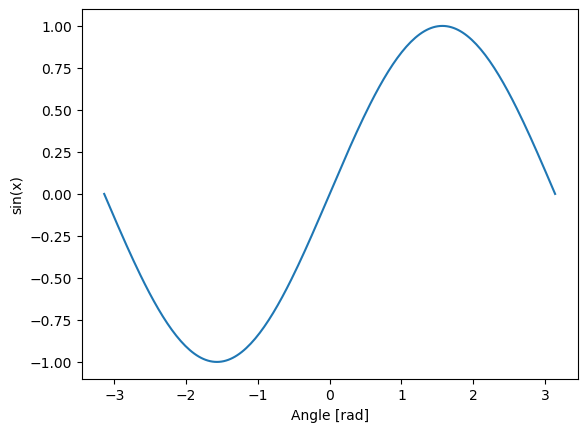

In [64]:
import matplotlib.pylab as plt

np.sin(np.array((0., 30., 45., 60., 90.)) * np.pi / 180. )

x = np.linspace(-np.pi, np.pi, 201)
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [65]:
# You could use a simple selection sort
import numpy as np
def selection_sort(x): 
    for i in range(len(x)): 
        swap = i + np.argmin(x[i:]) 
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [66]:
x = np.array([2, 1, 4, 3, 5]) 
selection_sort(x)

array([1, 2, 3, 4, 5])

In [67]:
x = np.array([2, 1, 4, 3, 5]) 
np.sort(x)

array([1, 2, 3, 4, 5])

# Using `np.polyfit`
`np.polyfit' performs a least squares polynomial fit--that is, it returns an vector of coefficients that bests fits the given data while minimizing the sqaured error.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


msba_students = {'hours_studied': [24,49,23,19,30,22,47,40,34,32,16,20,17,41,25,34,14,47,41,23,8,22,11,41,42,24,48,44,21,21,10,14,11,19,51],
            'test_score':         [48.98,91.13,34.73,31.58,54.23,35.73,84.93,76.68,58.28,62.38,25.43,33.73,33.63,70.63,48.03,68.48,19.28,87.03,72.63,37.83,15.13,37.83,16.28,73.68,81.88,47.98,97.18,78.78,35.68,34.68,7.08,19.28,19.28,30.63,97.23]}

df_student_data = pd.DataFrame(data=msba_students)

In [76]:
df_student_data

,hours_studied,test_score
0,24,48.98
1,49,91.13
2,23,34.73
3,19,31.58
4,30,54.23
5,22,35.73
6,47,84.93
7,40,76.68
8,34,58.28
9,32,62.38


In [77]:
x = df_student_data['hours_studied']
y = df_student_data['test_score']

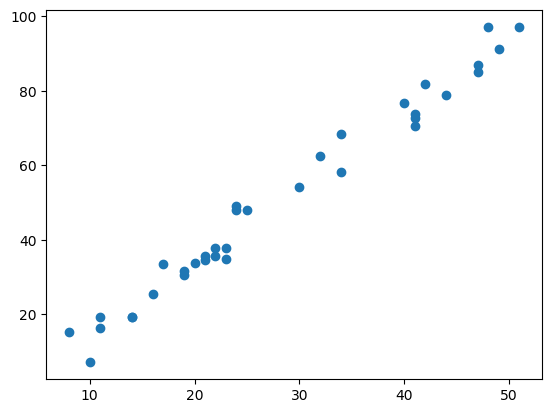

In [78]:
plt.scatter(x,y)

In [79]:
model = np.polyfit(x, y, 1)

In [80]:
print("np.polyfit result: ",model)
print(model[1], ' is m (slope) ', model[0], ' is b (intercept).')

np.polyfit result:  [ 2.00028161 -5.78078254]
-5.780782535014696  is m (slope)  2.0002816129193044  is b (intercept).


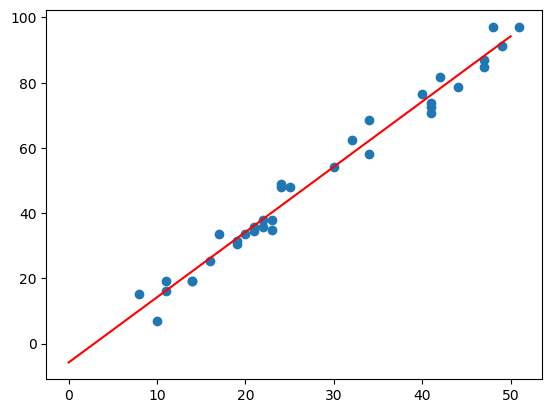

In [81]:
# To fit a regression line to the data

x_predict = range(0, 51) # Predict for 0 hours to 50 hours

# Equation for a line (y = mx + b)
y_predict = x_predict * model[0] + model[1]


#  This is equivalent to the previous line (y = mx + b)
#  You can comment out the previous line and uncomment these two lines
#   and the graph will remain the same.
#predict = np.poly1d(model)
#y_predict = predict(x_predict)

plt.scatter(x, y)
plt.plot(x_predict, y_predict, c = 'r')
